<a href="https://colab.research.google.com/github/namita0210/LearnDL-yt/blob/main/Text_Classification_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset

In [52]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) =imdb.load_data(num_words=10000)

In [53]:
print(f'''
Train Data Shape : {train_data.shape}
Train Labels Shape : {train_labels.shape}
Test Data Shape : {test_data.shape}
Test Labels Shape :{test_labels.shape}
''')

 
Train Data Shape : (25000,)
Train Labels Shape : (25000,)
Test Data Shape : (25000,)
Test Labels Shape :(25000,)



In [54]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [55]:
train_labels[0]

1

In [56]:
train_labels[1]

0

In [57]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [58]:
len(word_index)

88584

Text Transformation

In [70]:
def oh_representations(sequences,dim = 10000):
  results = np.zeros((len(sequences),dim))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [71]:
result = oh_representations(train_data)

In [72]:
result.shape

(25000, 10000)

In [73]:
result

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [74]:
result[0].shape

(10000,)

In [75]:
from tensorflow.keras import models,layers

In [76]:
network = models.Sequential()
network.add(layers.Dense(16,activation="relu",input_shape=(10000,)))
network.add(layers.Dense(16,activation="relu"))
network.add(layers.Dense(1,activation="sigmoid"))

In [77]:
network.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [78]:
X_train = oh_representations(train_data)
X_test = oh_representations(test_data)

In [79]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [80]:
history = network.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 8s 255ms/step - loss: 0.5543 - accuracy: 0.7736 - val_loss: 0.4348 - val_accuracy: 0.8538
Epoch 2/20
30/30 [==============================] - 2s 81ms/step - loss: 0.3611 - accuracy: 0.8847 - val_loss: 0.3408 - val_accuracy: 0.8781
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2688 - accuracy: 0.9093 - val_loss: 0.2922 - val_accuracy: 0.8854
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2161 - accuracy: 0.9285 - val_loss: 0.2774 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1823 - accuracy: 0.9400 - val_loss: 0.2788 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1564 - accuracy: 0.9479 - val_loss: 0.3048 - val_accuracy: 0.8785
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1386 - accuracy: 0.9550 - val_loss: 0.2876 - val_accuracy: 0.8865
Epoch 8/20
3

In [81]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [82]:
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

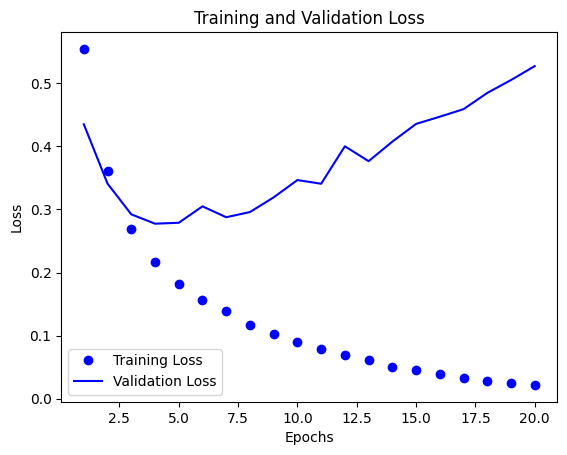

In [84]:
epoch=range(1,len(acc)+1)
plt.plot(epoch,loss,'bo',label='Training Loss')
plt.plot(epoch,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [86]:
history = network.fit(partial_x_train,partial_y_train,epochs=6,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/6
30/30 [==============================] - 2s 77ms/step - loss: 0.0040 - accuracy: 0.9999 - val_loss: 0.7323 - val_accuracy: 0.8661
Epoch 2/6
30/30 [==============================] - 1s 35ms/step - loss: 0.0076 - accuracy: 0.9985 - val_loss: 0.7538 - val_accuracy: 0.8657
Epoch 3/6
30/30 [==============================] - 1s 34ms/step - loss: 0.0031 - accuracy: 0.9999 - val_loss: 0.7996 - val_accuracy: 0.8648
Epoch 4/6
30/30 [==============================] - 1s 50ms/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.7986 - val_accuracy: 0.8660
Epoch 5/6
30/30 [==============================] - 1s 35ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.8132 - val_accuracy: 0.8660
Epoch 6/6
30/30 [==============================] - 1s 33ms/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.8322 - val_accuracy: 0.8659


In [87]:
results=network.evaluate(X_test,test_labels)

782/782 [==============================] - 2s 2ms/step - loss: 0.8872 - accuracy: 0.8550
